# Chapter 13 Red-Black Trees
## Notes

https://www.cs.usfca.edu/~galles/visualization/RedBlack.html
Red-Black tree visualization

### Properties

One more attribute added to binary search trees: color, which is either red or black.

1. every node is either red or black
2. the root is black
3. every leaf(Nil) is black
4. If a node is red, then both its children are black
5. For each node, all simple paths from node to descendant leaves contain the same number of black nodes

By property 5, **black-height**, the number of black nodes on any simple path from, but not including a node $x$ down to a leaf, is well defined.
 
> A red-black tree with $n$ internal nodes has height at most $2\lg (n+1)$.

Proof. 
- Claim that the subtree rooted at any node $x$ contains at least $2^{bh(x)}-1$ internal nodes. 
- This can be proved by induction on the height of $x$ (not black-height) based on the observation that each child (less height) has black height either $bh(x)-1$ or $bh(x)$. 
- Also it's clear that $bh(root) \geq h/2$
- $n > 2^{bh(x)}-1 \geq 2^{h/2} - 1 \Rightarrow  h\leq 2\lg(n+1)$

Search, Minimum, Maximum, Successor and Prodecessor can be done in $O(\lg n)$ time.

### Rotations
rotation is a local operation that preserves the binary search tree property

<img src="img/13-2Rotations.png">

$\alpha < x < y < \gamma$ and $x <\beta < y$ are preserved.

### Insertion


### Deletion

Deletion of a node takes time $O(\lg n)$ but is a bit more compplicated than inserting a node.

Customized version of Transplant subroutine.


In [38]:
def left_rotate(T, x):
    y = x.right
    x.right = y.left
    if y.left != T.nil:
        y.left.p = x
    y.p = x.p
    if x.p == T.nil:
        T.root = y
    elif x == x.p.left:
        x.p.left = y
    else:
        x.p.right = y
    y.left = x
    x.p = y
    
def right_rotate(T, y):
    x = y.left
    y.left = x.right
    if x.right != T.nil:
        x.right.p = y
    x.p = y.p
    if y.p == T.nil:
        T.root = x
    elif y == y.p.right:
        y.p.right = x
    else:
        y.p.left = x
    x.right = y
    y.p = x

red = 0
black = 1
class RBNode:
    def __init__(self, left, right, p, key, color):
        self.left = left
        self.right = right
        self.p = p
        self.key = key
        self.color = color

class RBTree:
    global red, black    
    def __init__(self):
        self.nil = RBNode(None, None, None, None, black)
        self.root = self.nil
    
def rb_insert(T, z):
    global red, black
    y = T.nil
    x = T.root
    while x != T.nil:
        y = x
        if z.key < x.key:
            x = x.left
        else:
            x = x.right
    z.p = y
    if y == T.nil:
        T.root = z
    elif z.key < y.key:
        y.left = z
    else: 
        y.right = z
    z.left = T.nil
    z.right = T.nil
    z.color = red # red:0, black:1
    rb_insert_fixup(T, z)
def rb_insert_fixup(T, z):
    global red, black
    while z.p.color == red:
        if z.p == z.p.p.left:
            y = z.p.p.right
            if y.color == red:
                z.p.color = black
                y.color = black
                z.p.p.color = red
                z = z.p.p
            else:
                if z == z.p.right:
                    z = z.p
                    left_rotate(T, z) # to make sure z is left child
                z.p.color = black
                z.p.p.color = red
                right_rotate(T, z.p.p)
        else: #z.p can't be root since its color is red
            y = z.p.p.left
            if y.color == red:
                z.p.color = black
                y.color = black
                z.p.p.color = red
                z = z.p.p
            else:
                if z ==  z.p.left:
                    z = z.p
                    right_rotate(T, z)
                z.p.color = black
                z.p.p.color = red
                left_rotate(T, z.p.p)
    T.root.color = black # we may have changed root's color to red

def rb_transplant(T, u, v):
    if u.p == T.nil:
        T.root = v
    elif u == u.p.left:
        u.p.left = v
    else:
        u.p.right = v
    v.p = u.p
    
def rb_delete(T, z):
    global red, black
    y = z
    y_original_color = y.color
    if z.left == T.nil:
        x = z.right
        rb_transplant(T, z, z.right)
    elif z.right == T.nil:
        x = z.left
        rb_transplant(T, z, z.left)
    else: 
        y = tree_minimum(z.right)
        y_original_color = y.color
        x = y.right
        if y.p == z:
            x.p = y
        else:
            rb_transplant(T, y, y.right)
            y.right = z.right
            y.right.p = y
        rb_transplant(T, z, y)
        y.left = z.left
        y.left.p = y
        y.color = z.color
    if y_original_color == black:
        rb_delete_fixup(T, x)
    
def rb_delete_fixup(T, x):
    global red, black
    while x != T.root and x.color == black:
        if x == x.p.left:
            w = x.p.right
            if w.color == red:
                w.color = black    # case 1
                x.p.color = red
                left_rotate(T, x.p)
                w = x.p.right
            if w.left.color == black and w.right.color == black:
                w.color = red      # case 2
                x = x.p
            else:
                if w.right.color == black:
                    w.left.color = black # case 3
                    w.color = red
                    right_rotate(T, w)
                    w = x.p.right
                w.color = x.p.color      # case 4
                x.p.color = black
                w.right.color = black
                left_rotate(T, x, p)
                x = T.root
        else:
            continue #TODO
def inorder_rb_tree_walk(x):
    if x != None and x.key != None:
        inorder_rb_tree_walk(x.left)
        print x.key, x.color
        inorder_rb_tree_walk(x.right)
        
def write_tree_as_dot(T, f, show_nil=False):
    "Write the tree in the dot language format to f."
    def node_id(node):
        return 'N%s' % node.key
    
    def node_color(node):
        if node.color == red:
            return "red"
        else:
            return "black"
    
    def visit_node(node):
        "Visit a node."
        print >> f, "  %s [label=\"%s\", color=\"%s\"];" % (node_id(node), node.key, node_color(node))
        if node.left:
            if node.left != T.nil or show_nil:
                visit_node(node.left)
                print >> f, "  %s -> %s ;" % (node_id(node), node_id(node.left))
        if node.right:
            if node.right != T.nil or show_nil:
                visit_node(node.right)
                print >> f, "  %s -> %s ;" % (node_id(node), node_id(node.right))
             
    print >> f, "// Created by rbtree.write_dot()"
    print >> f, "digraph red_black_tree {"
    visit_node(T.root)
    print >> f, "}"


import os

T = RBTree()
for i in range(1, 9):
    rb_insert(T, RBNode(None, None, None, i, red))

filename = 'tree66'
f = open('img/%s.dot' % filename, 'w')
write_tree_as_dot(T, f, False)
os.system('dot img/%s.dot -Tsvg -o img/%s.svg' % (filename, filename))

0

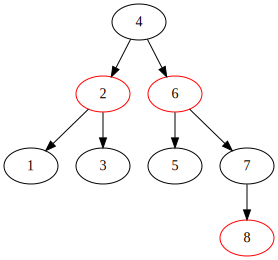

In [39]:
from IPython.display import SVG
def show_svg(filename):
    return SVG(filename='img/%s.svg' % filename)
show_svg(filename)

In [43]:
# 

## Exercises
### 13.1-1

### 13.1-2

No, its parent is red, by 4) it has to be black.

No, black-height changed, 5) no longer holds.

### 13.1-3

### 13.1-4

### 13.1-5

### 13.1-6

### 13.1-7

### 13.2-1

In [3]:
def right_rotate(T, y):
    x = y.left
    y.left = x.right
    if x.right != T.nil:
        x.right.p = y
    x.p = y.p
    if y.p == T.nil:
        T.root = x
    elif y ==y.p.left:
        y.p.left = x
    else:
        y.p.right = x
    x.right = y
    y.p = x

### 13.2-2
each rotation corresponds to one edge, there are $(n-1)$ edges in a $n$-node binary tree.

### 13.2-3

### 13.2-4

### 13.2-5

### 13.3-1
black-height of some paths would be changed and that would be harder to fix than fixing colors.

## Problems